## Imports

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import cv2

import os

## Constants

In [0]:
NUM_CLASSES = 2

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

LOSS_METRICS = ['accuracy']

NUM_EPOCHS = 10

STEPS_PER_EPOCH_TRAINING = 28
STEPS_PER_EPOCH_VALIDATION = 14

BATCH_SIZE_TRAINING = 32
BATCH_SIZE_VALIDATION = 16


In [0]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.optimizers import Adam

## Dataset

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
train_dir = '../gdrive/My Drive/classified/kit/train'
test_dir = '../gdrive/My Drive/classified/kit/test'

## ResNet50

In [0]:
model = Sequential()

model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, 
                   weights='imagenet'))

model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False


94658560/94653016 [==============================] - 3s 0us/step


W0723 11:32:51.834123 140523097900928 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
from tensorflow.python.keras import optimizers

optimizer = Adam()
model.compile(optimizer=optimizer, loss=OBJECTIVE_FUNCTION, 
              metrics=LOSS_METRICS)


In [0]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical',
        shuffle=False)

Using TensorFlow backend.


Found 896 images belonging to 2 classes.
Found 224 images belonging to 2 classes.


In [0]:
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))

(32, 28, 16, 14)

In [0]:
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION
)

Epoch 1/10
28/28 [==============================] - 291s 10s/step - loss: 0.4681 - acc: 0.7734 - val_loss: 0.3848 - val_acc: 0.7991
Epoch 2/10
28/28 [==============================] - 266s 9s/step - loss: 0.2706 - acc: 0.8906 - val_loss: 0.3850 - val_acc: 0.8170
Epoch 3/10
28/28 [==============================] - 265s 9s/step - loss: 0.1847 - acc: 0.9330 - val_loss: 0.2072 - val_acc: 0.9152
Epoch 4/10
28/28 [==============================] - 265s 9s/step - loss: 0.1662 - acc: 0.9408 - val_loss: 0.3899 - val_acc: 0.8259
Epoch 5/10
28/28 [==============================] - 266s 10s/step - loss: 0.1311 - acc: 0.9643 - val_loss: 0.2277 - val_acc: 0.9018
Epoch 6/10
28/28 [==============================] - 266s 10s/step - loss: 0.1116 - acc: 0.9710 - val_loss: 0.2020 - val_acc: 0.9286
Epoch 7/10
28/28 [==============================] - 265s 9s/step - loss: 0.1241 - acc: 0.9576 - val_loss: 0.3097 - val_acc: 0.8616
Epoch 8/10
28/28 [==============================] - 265s 9s/step - loss: 0.0956 

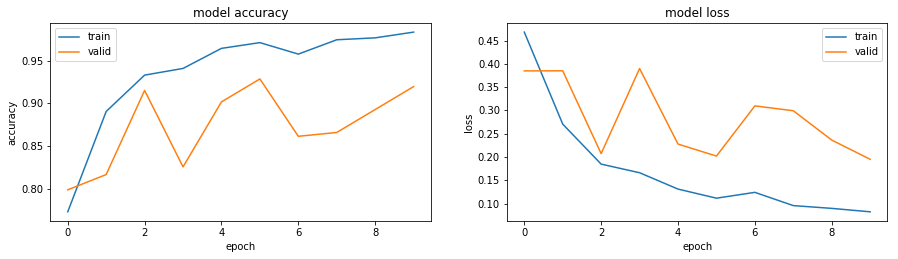

In [0]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['acc'])  
plt.plot(fit_history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [0]:
result = model.evaluate_generator(validation_generator, 
                                  steps=STEPS_PER_EPOCH_VALIDATION)


In [0]:
print("Test-set classification accuracy: {0:.2%}".format(result[1]))


Test-set classification accuracy: 91.96%
